<a href="https://colab.research.google.com/github/MsAnalyst/StatisticsforBusinessFP/blob/main/Statistics_for_Business_Final_Project_Sleep_Disorder_(Dewi_I4Zs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistics for Business - Final Project on Sleep Disorder**
# Student: Dewi Astuti (Dewi_I4Zs)

Creating a model  

## **Project Background**
...

In [ ]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#setting default theme
sns.set_theme(style='white', palette='tab20')
pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()




**Import Data**

In [ ]:
#Import the data
#url = '/content/Sleep_health_and_lifestyle_dataset.csv'
#df = pd.read_csv(url)
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',encoding='latin1')
df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Data Definition
The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.



**Data Description**

Deskripsi Variabel:
Key Features of the Dataset:
Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

Dataset Columns:
1. **Person ID**:  A unique identifier for each person.
2. **Gender**: The person's gender (Male/Female).
3. **Age**: The person's age in years.
4. **Occupation**: The person's profession or job.
5. **Sleep Duration (hours)**: The number of hours the person sleeps per day.
6. **Quality of Sleep (scale: 1-10)**: A subjective rating of the person's sleep quality, ranging from 1 to 10.
7. **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
8. **Stress Level (scale: 1-10)**: A subjective rating of the person's stress level, ranging from 1 to 10.
9. **BMI Category**: The person's BMI category, such as Underweight, Normal, or Overweight.
10. **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, represented as systolic pressure over diastolic pressure.
11. **Heart Rate (bpm)**: The person's resting heart rate in beats per minute.
12. **Daily Steps**: The number of steps the person takes per day.
13. **Sleep Disorder**: Indicates whether the person has a sleep disorder (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column**:
None: The person does not show any specific sleep disorder.

Insomnia: The person faces challenges in initiating or maintaining sleep, which leads to insufficient or substandard sleep quality.

Sleep Apnea: The person experiences interruptions in breathing while asleep, causing disruptions in sleep patterns and possible health hazards.


Variabel target (outcome) applied is whether the person has a **sleep disorder (None, Insomnia, Sleep Apnea)**.

# **Exploratory Data Analysis**

EDA - PART 1
Check the data:
*   Missing Values and Duplicated Data
*   Data Type
*   Descriptive Statistics



**Check Missing Values and Duplicated Data**

In [ ]:
#Check the proportion of missing values data in each feature.
#Check whether there is any duplicated data.

print("Missing values proportion:")
print(df.isnull().sum()/df.shape[0]) # On missing values in each feature
print("="*50)
print("Duplicate data:")
print(df.duplicated().sum()) # On duplicated data

Missing values proportion:
Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64
Duplicate data:
0


Result:
- Data is clean, no need to handling missing values.
- No duplicated data, we don't need to handle duplicated data.

In [ ]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Sleep Patterns and Blood Pressure**
In another study, sleep patterns significantly predicted SBP and DBP in multivariable‐adjusted models, thus it is important to look detailed into Systolic Blood Pressure (SBP) and Diastolic Blood Pressure (DBP)

In [ ]:
#Separate the Systolic Blood Pressure (SBP) and Diastolic Blood Pressure (DBP)
df["SBP (mm Hg)"] = 0
df["DBP (mm Hg)"] = 0

for i, val in enumerate(df["Blood Pressure"]):
    j = 0

    while val[j] != "/":
        j += 1
        continue

    df.loc[i, "SBP (mm Hg)"] = int(val[:j])
    df.loc[i, "DBP (mm Hg)"] = int(val[(j+1):])

#Remove column 'Blood Pressure'
df.drop('Blood Pressure', axis=1, inplace=True)
print("Successfully created numeric categories SBP (mm Hg) and DBP (mm Hg), dropped Blood Pressure")

Successfully created numeric categories SBP (mm Hg) and DBP (mm Hg), dropped Blood Pressure


In [ ]:
#define updated data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  SBP (mm Hg)              374 non-null    int64  
 13  DBP (mm Hg)              374 non-null    int64  
dtypes: float64(1), int64(9), o

**Descriptive Analysis**

Descriptive analysis process to obtain a general description of the characteristics of each variable seen from the average (mean), maximum and minimum values, standard deviation, and others.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0
SBP (mm Hg),374.0,128.553476,7.748118,115.0,125.00,130.0,135.00,142.0
DBP (mm Hg),374.0,84.649733,6.161611,75.0,80.00,85.0,90.00,95.0


In [ ]:
#Change data type.
dict_ = {"Gender" : "category", "Age" : "int64", "Occupation" : "category", "Sleep Duration" : "int64", "Quality of Sleep" : "int64",
         "Physical Activity Level" : "int64", "Stress Level" : "int64", "BMI Category" : "category", "Heart Rate" : "int64", "Daily Steps" : "int64",
         "Sleep Disorder": "category",  "SBP (mm Hg)" : "int64", "DBP (mm Hg)" : "int64"}
df = df.astype(dict_) #Change data according to the dictionary.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    category
 4   Sleep Duration           374 non-null    int64   
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    category
 9   Heart Rate               374 non-null    int64   
 10  Daily Steps              374 non-null    int64   
 11  Sleep Disorder           374 non-null    category
 12  SBP (mm Hg)              374 non-null    int64   
 13  DBP (mm Hg)              374 non-null    int64   
dtypes: categor

# **Define The Problems:**
- Which variables in the data have an influence on the probability of a person experiencing sleep disorder?
- Does the stress variable have a strong relationship with the probability of a person experiencing sleep disorder?
- Does the age variable have a strong relationship with a person's probability of experiencing sleep disorder?
- Does the gender variable have a strong relationship with a person's probability of experiencing sleep disorder?
- Does the variable physical activity level, BMI Category, and daily steps have a strong relationship with the probability of a person experiencing sleep disorder?
- What is the final conclusion? what are the recommendations?

**Visualization**
Visualization of each feature is carried out to see their distributions.

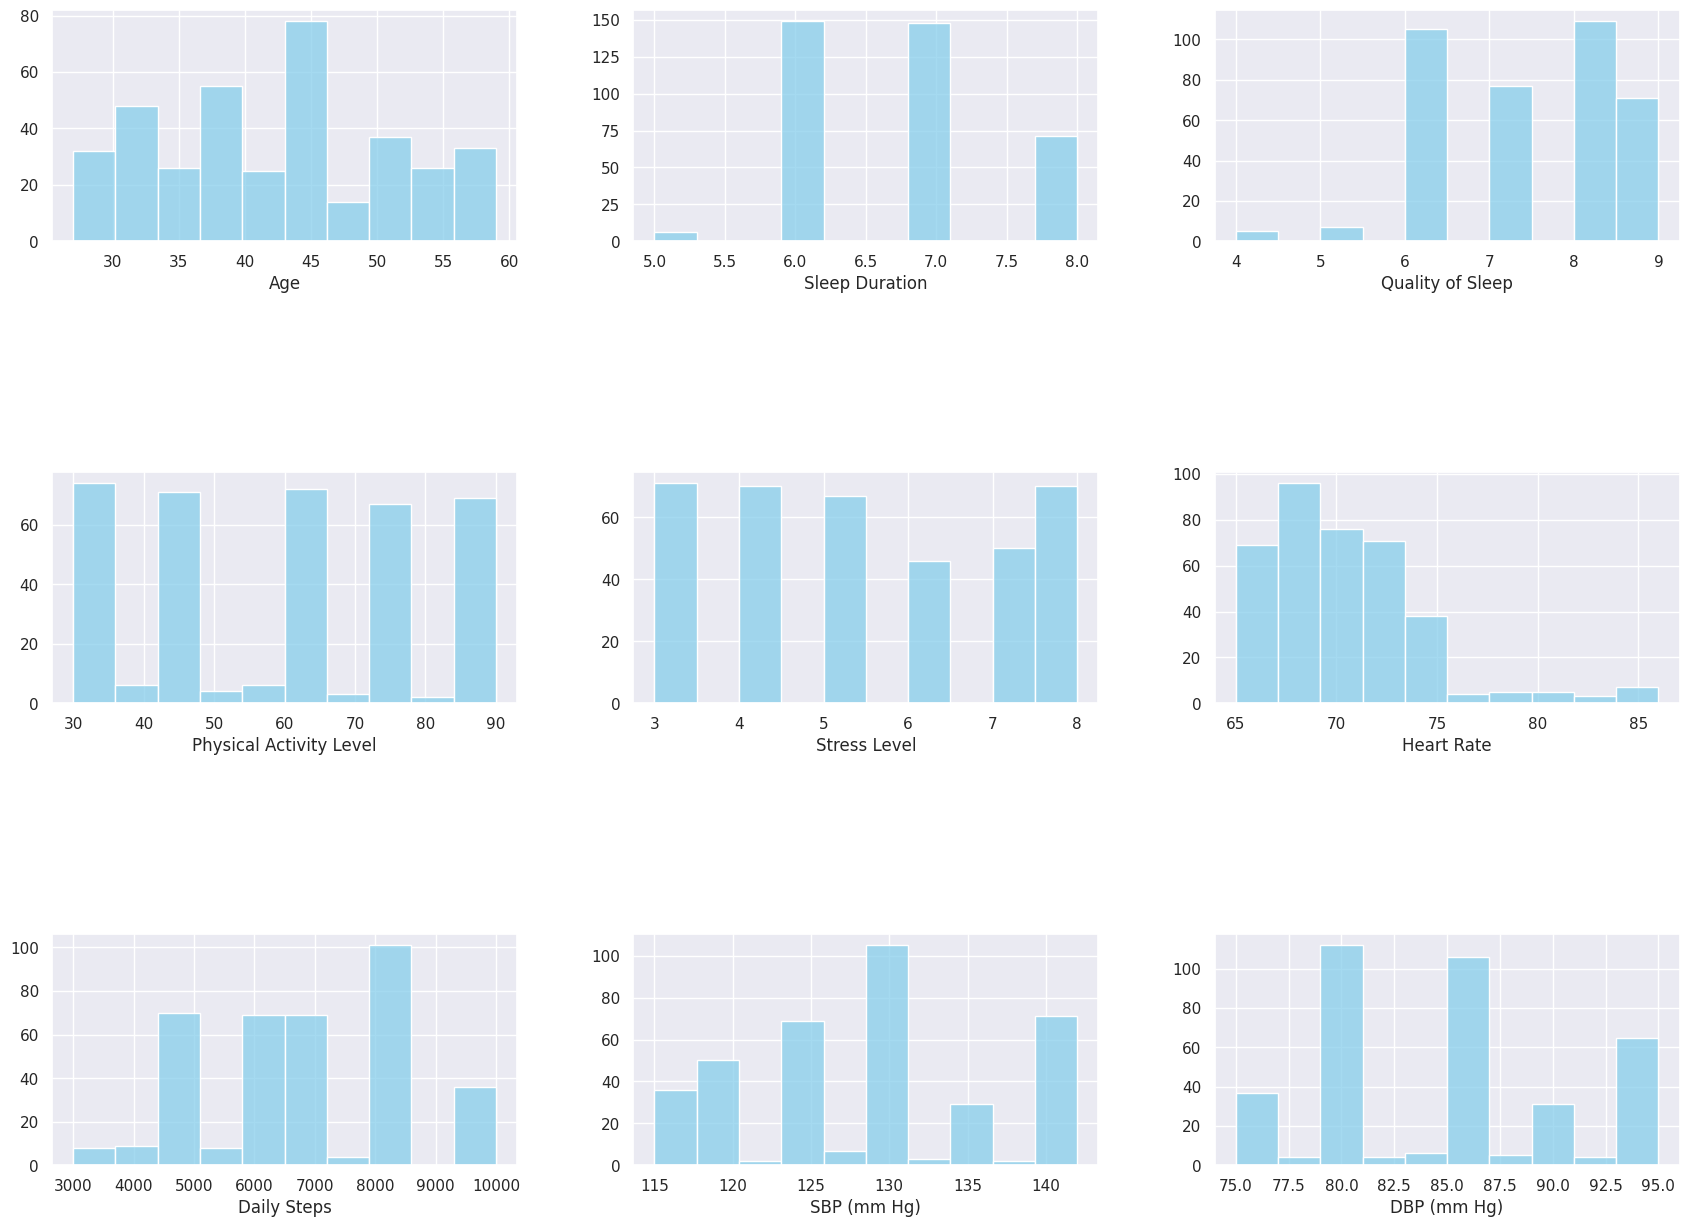

In [ ]:
#Review the numerical distribution.
fig, axs = plt.subplots(3, 3, figsize=(21, 15))
plt.subplots_adjust(wspace=0.25, hspace=1)

numerical = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "SBP (mm Hg)", "DBP (mm Hg)"]

for i, cat in enumerate(numerical):
    sns.histplot(df[cat], bins=10, color='skyblue', ax=axs[int(i/3), i%3]).set_ylabel("")

plt.show()



**Analysis:**
* Quality of Sleep: Appears to follow an exponential pattern, with a tendency towards higher values.
* Age: Appears to be relatively normal, without any outliers present.
* Sleep Duration: Uniformly distributed.
* Physical Activity Level: Uniformly distributed.
* Stress Level: Appears to be skewed towards higher values, indicating a higher prevalence of elevated stress levels.
* Heart Rate: Appears to follow an exponential pattern, with a bias towards lower heart rates.
* Daily Steps: Normal distribution pattern.
* SBP (mm Hg): Appears to be somewhat normal, but it is possible that it conforms to a different type of distribution.
* DBP (mm Hg): Appears to be a somewhat normal pattern. Notably, the distribution differs from that of SBP.

There are peculiarities in the distributions of sleep quality, stress level, physical activity level, blood pressure, and daily steps. These irregularities might be attributed to issues with the survey questions asked during data collection. Further investigation is required to explain these sporadic patterns, which could potentially impact the confirmation of certain distributions.

No outliers are evident in the data, suggesting that the dataset has already been cleaned or is relatively free from extreme values. All parameters appear to be intuitively related to sleep quality, indicating their potential relevance for the subsequent statistical analysis. Therefore, none of the parameters can be discarded, and it is essential to conduct further analysis to determine their statistical significance and influence on sleep quality.

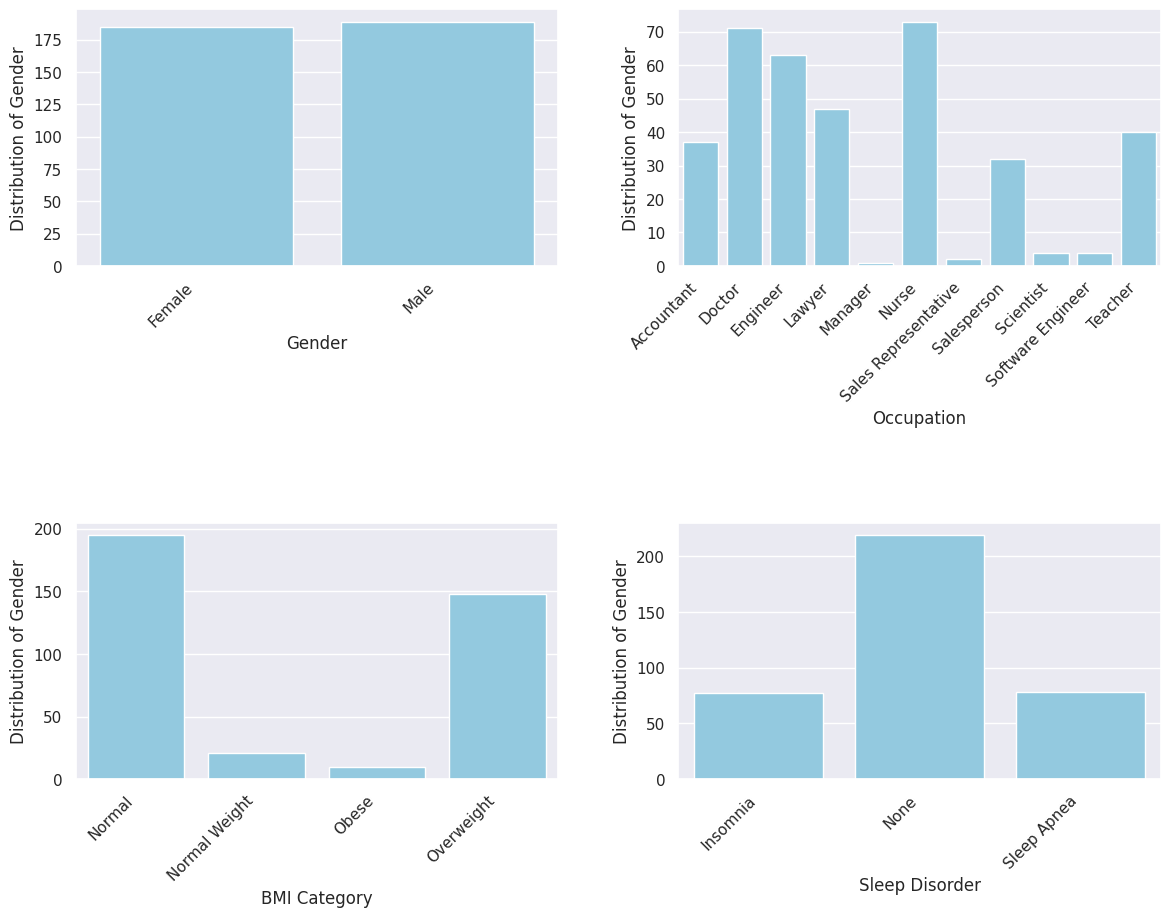

In [ ]:
#Review the categorical distribution.
categorical = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]

index_ = 0
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) #Create figures and axis for subplots
plt.subplots_adjust(wspace=0.25, hspace=1)

for i, cat in enumerate(categorical):
    sns.countplot(x=cat, data=df, color='skyblue', ax=axs[int(i/2), i%2]).set_ylabel(f"Distribution of {categorical[index_]}")
    plt.xticks(rotation=45)

for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
        index_ +=1
#plt.tight_layout()
plt.show()

** Parameters and Analysis: **
* Gender (binary-class): The distribution of gender is balanced and could potentially have an influence on sleep.
* Occupation (multi-class): Some occupations have insufficient representation to draw meaningful conclusions. To address this, we will exclude all occupations with a count lower than 20 and replace them with an "unknown" class.
* BMI Category (multi-class): There is a relatively even distribution between overweight and normal categories. We noticed a possible typo with "Normal Weight," which will be corrected to "Normal." Additionally, due to a lack of samples, we will combine the "Obese" category with the "Overweight" category, considering they are closely related.
* Sleep Disorder (multi-class): The distribution shows an equal split between individuals with and without sleep disorders. The specific disorders identified are sleep apnea and insomnia, which might be potential response variables.



##Transforming Categorical Parameters:
* To simplify the BMI category, we will merge the "Normal Weight" category with "Normal." Furthermore, we will combine the "Obese" category with the "Overweight" category, reducing the number of values to avoid potential overfitting issues.
* For the occupation category, we will streamline the classes by removing those with fewer than 20 instances and group them into a new class labeled "unknown." It's essential to acknowledge that this new class may carry some inherent bias based on the original classes and should not be used as a baseline.

In [ ]:
# Change the Normal weight to Normal

df.loc[df["BMI Category"] == "Normal Weight", "BMI Category"] = "Normal"
df.loc[df["BMI Category"] == "Obese", "BMI Category"] = "Overweight"

print("The 'Normal Weight' has been changed to 'Normal'")
print("The 'Obese' has been changed to 'Overweight'")

The 'Normal Weight' has been changed to 'Normal'
The 'Obese' has been changed to 'Overweight'


In [ ]:
# Simplify the occupation

cut_off = 20
new_label = "Unknown"

# Get the value counts
count_data = df["Occupation"].value_counts()
to_replace = count_data[count_data < cut_off].index

# Replace the labels
df["Occupation"] = df["Occupation"].replace(to_replace, new_label)

print(f"All occupation below have been {cut_off} to {new_label}")

All occupation below have been 20 to Unknown


## **Interaction**

## Feature Analysis in Relation to Response Variables:

For this analysis, we will consider sleep duration and sleep disorder as our response variables, as they provide a combination of numeric and categorical insights, making the study more intriguing.

Numeric Values:

1. Construct a correlation matrix to analyse the linear correlations between features.
2. Generate scatterplots to visualize the relationship with sleep duration.
3. Employ split-boxplots to compare the means of sleep duration among different levels.

Categorical Values:
1. Calculate the mean sleep duration for each level of the categorical variables.
2. Utilize ANOVA analysis to determine if there are significant differences in means across the various levels.
3. Present the relationship between sleep disorder and other categorical variables using stacked bar plots.



**Numeric**

Plotting against sleep duration

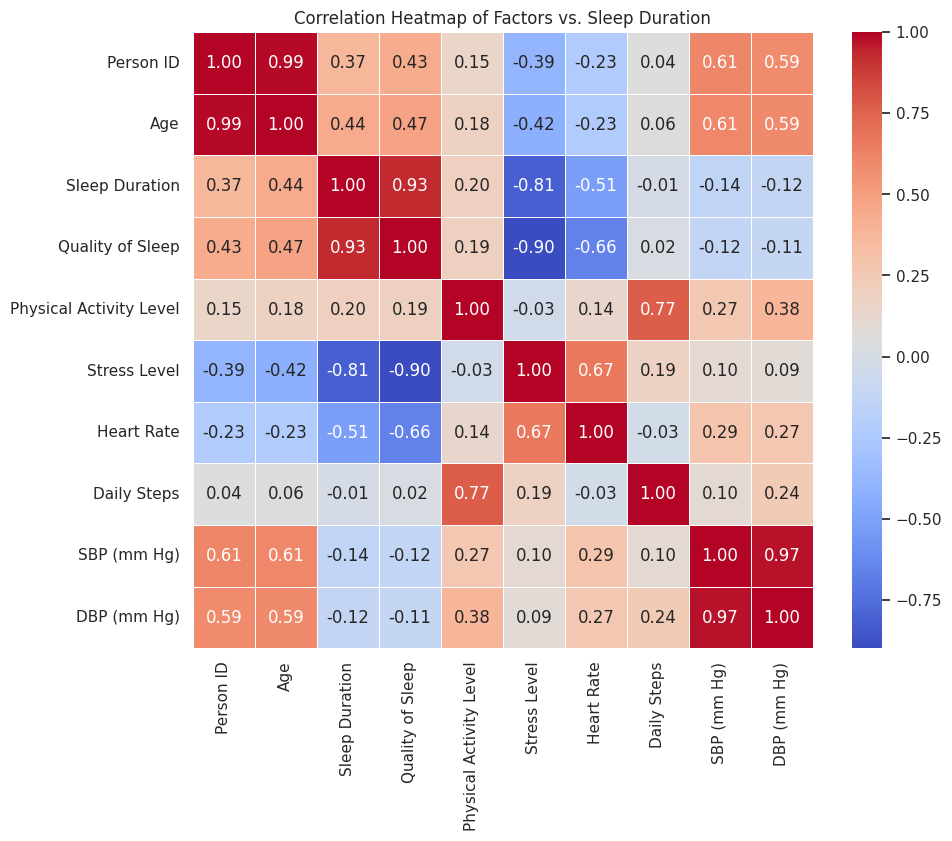

In [ ]:
# The code below aims to construct linear correlations between features.
selected_columns = df.select_dtypes(include=['number'])

correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Sleep Duration')
plt.show()

**The correlation matrix reveals intriguing findings.**
There is a significant correlation between stress level and sleep duration, as well as between stress level and sleep quality.
High and low blood pressure exhibit a very strong correlation. I will focus on low_pressure for further analysis. Utilizing the harmonic mean could potentially yield a more accurate parameter.

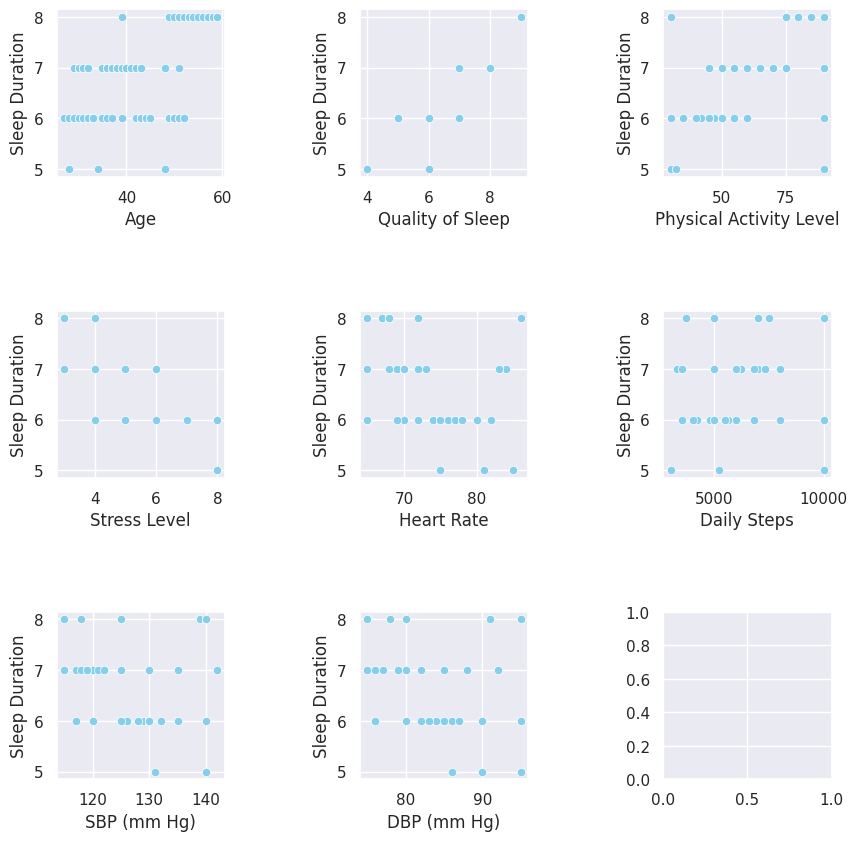

In [ ]:
# The code below aims to see the distribution of Sleep Duration using a scatterplot
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric_x = ["Age", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "SBP (mm Hg)", "DBP (mm Hg)"]

for i, cat in enumerate(numeric_x):
    sns.scatterplot(x = cat, y= "Sleep Duration", data=df, color='skyblue', ax=axs[int(i/3), i%3])

plt.show()

Results from Scatterplot:

The Scatterplot analysis reveals the following insights:

1. Physical Activity Level: It demonstrates a linear relationship with sleep duration, but there is a significant number of outliers in the left-top and right-bottom corners of the plot. The presence of these outliers could be due to extreme values or specific situations where individuals with very low or very high physical activity levels experience abnormal sleep durations.

2. Heart Rate and Sleep Duration: As heart rate increases, sleep duration tends to decrease. However, it is crucial not to hastily conclude causality here, as it is more likely that the relationship is the other way around. Changes in sleep duration could potentially influence heart rate rather than the reverse.

3. Linear Relationships: Most of the variables exhibit somewhat linear relationships with sleep duration. However, the scatterplot faces an issue where some data points overlap, leading to these points being weighted more heavily in the analysis.

Based on these results, no parameters will be eliminated at this stage. Instead, a regularization technique will be employed during the model-building process to exclude irrelevant parameters and prevent overfitting. This approach ensures that all variables are considered during the analysis, and the regularization process will help identify the most influential predictors for the final model.

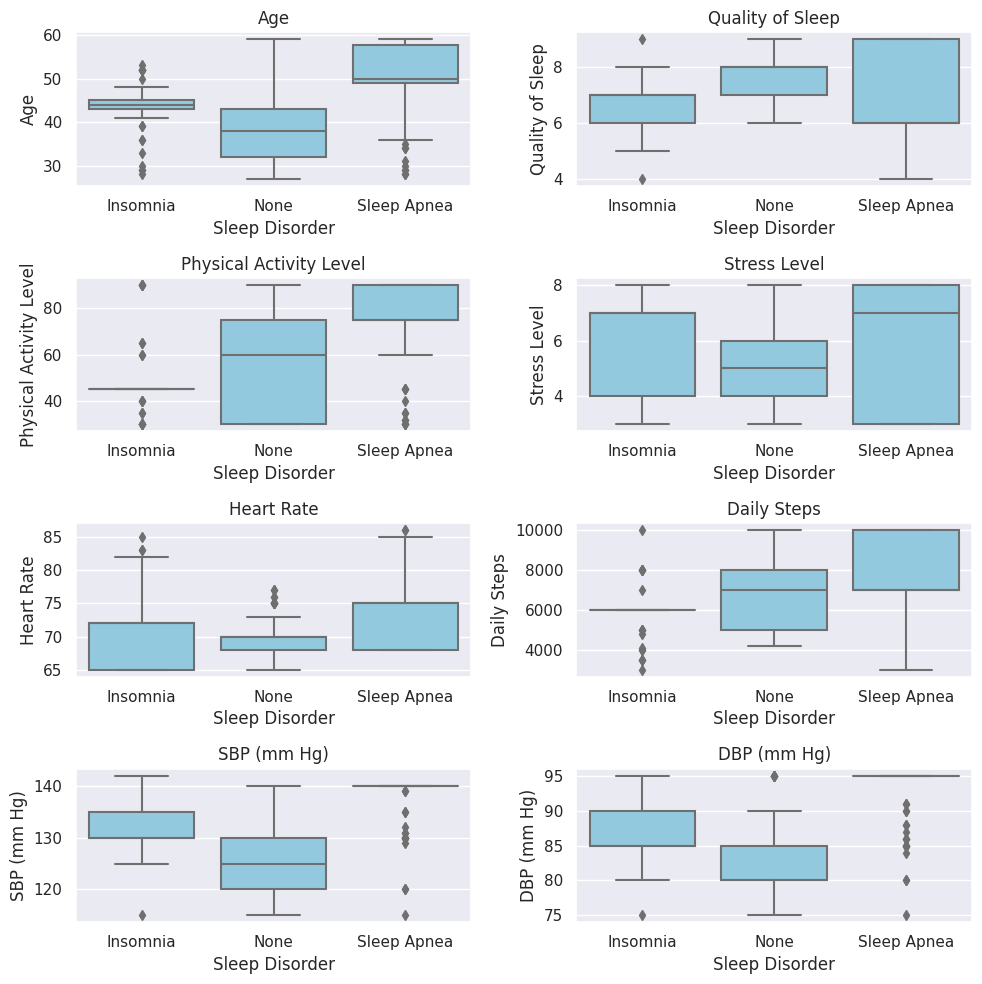

In [ ]:
# Create a grid of plots
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

# Iterate over pairs of parameters

for i, ax in enumerate(axs.flat):
    sns.boxplot(x='Sleep Disorder', y=numeric_x[i], data=df, color='skyblue', ax=ax).set_title(numeric_x[i])

plt.tight_layout()
plt.show()

**Results from Boxplots for Different Levels of Sleep Disorders**

The boxplot analysis reveals the following observations:
1. Sleep Apnea vs. None: A more prominent distinction is apparent between individuals with Sleep Apnea and those with no Sleep Disorder, compared to the difference between Insomnia and no Sleep Disorder.

2. Insomnia Mean Values: Insomnia appears to have higher mean values across the various categories.

3. Age and Low Blood Pressure: The most substantial difference between the different levels of sleep disorders is observed in the Age and Low Blood Pressure parameters.

**Categorical Values**
Analysis in relation to sleep duration

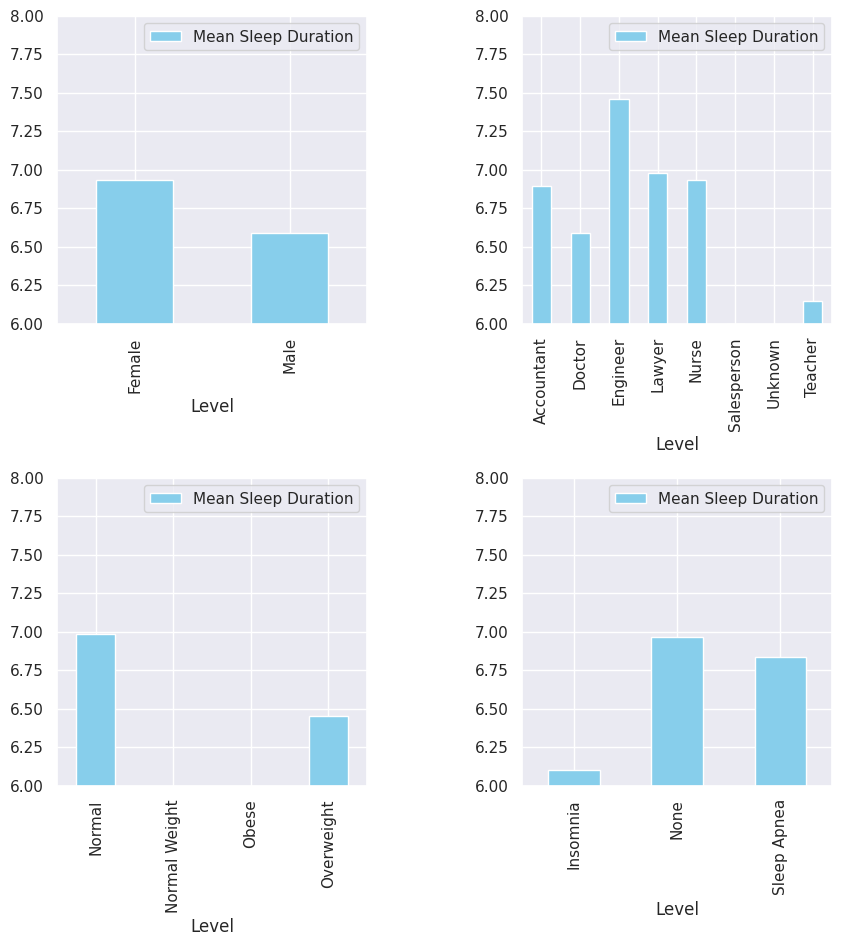

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]

for i,cat in enumerate(categorical):
    mean_values = df.groupby(cat)["Sleep Duration"].mean()
    temp_df = df.isna().sum()
    temp_df = pd.DataFrame(mean_values).reset_index()
    temp_df.columns = ["Level", "Mean Sleep Duration"]
    temp_df.plot(kind='bar', x="Level", y="Mean Sleep Duration", color ="skyblue", ax=axs[int(i/2), i%2])
    axs[int(i/2), i%2].set_ylim(6,8)

plt.show()


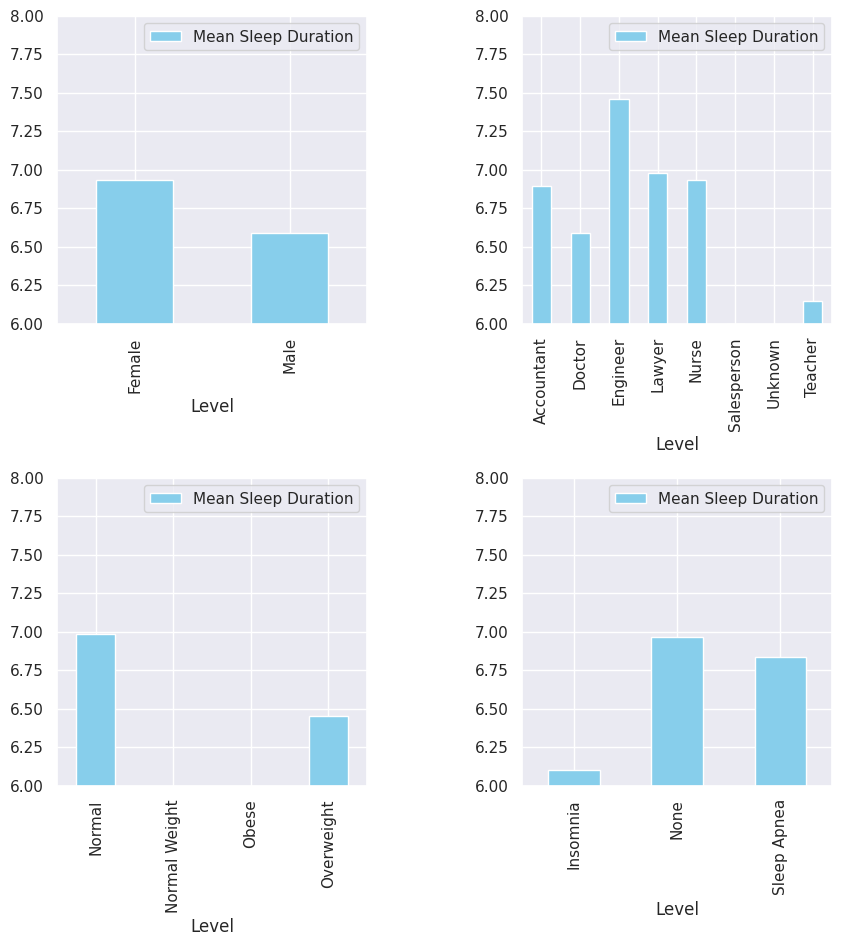

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]

for i,cat in enumerate(categorical):
    mean_values = df.groupby(cat)["Sleep Duration"].mean()
    temp_df = df.isna().sum()
    temp_df = pd.DataFrame(mean_values).reset_index()
    temp_df.columns = ["Level", "Mean Sleep Duration"]
    temp_df.plot(kind='bar', x="Level", y="Mean Sleep Duration", color ="skyblue", ax=axs[int(i/2), i%2])
    axs[int(i/2), i%2].set_ylim(6,8)

plt.show()

**Results from Mean Analysis:**

Evident distinctions are noticeable among the various levels. However, to ascertain the statistical significance of these differences, an ANOVA test will be conducted.

ANOVA is used to compare the population mean, not the population variance. The right types of data for ANOVA are nominal and ordinal on the independent variable, if the data on the independent variable is in the form of intervals or ratios, it must be changed first to ordinal or nominal form.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in categorical:
    mod = ols('Q("Sleep Duration") ~ C(Q("{}"))'.format(col), data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print("ANOVA result for column: ", col)
    print(aov_table)
    print("\n")

ANOVA result for column:  Gender
                    sum_sq     df          F    PR(>F)
C(Q("Gender"))   11.311101    1.0  19.938902  0.000011
Residual        211.031145  372.0        NaN       NaN


ANOVA result for column:  Occupation
                        sum_sq     df          F        PR(>F)
C(Q("Occupation"))   83.050879    7.0  31.174757  8.292889e-34
Residual            139.291367  366.0        NaN           NaN


ANOVA result for column:  BMI Category
                          sum_sq     df          F        PR(>F)
C(Q("BMI Category"))   78.866928    3.0  49.881846  8.076518e-12
Residual              196.053270  372.0        NaN           NaN


ANOVA result for column:  Sleep Disorder
                            sum_sq     df          F        PR(>F)
C(Q("Sleep Disorder"))   42.632319    2.0  44.005889  7.088262e-18
Residual                179.709927  371.0        NaN           NaN




**Conclusion from ANOVA:**

With a significance level of 5% (alpha = 0.05), the ANOVA results indicate that all of the categorical variables exhibit statistical significance. The means between different classes are not equal with a confidence level of 95%. Though conducting multiple calculations consecutively may slightly reduce the confidence level, it remains adequately high for our analysis. While a Fisher's test could identify specific differences between levels within a category, it is not necessary for the current investigation.

** Analysis in relation to sleep disorder **


AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

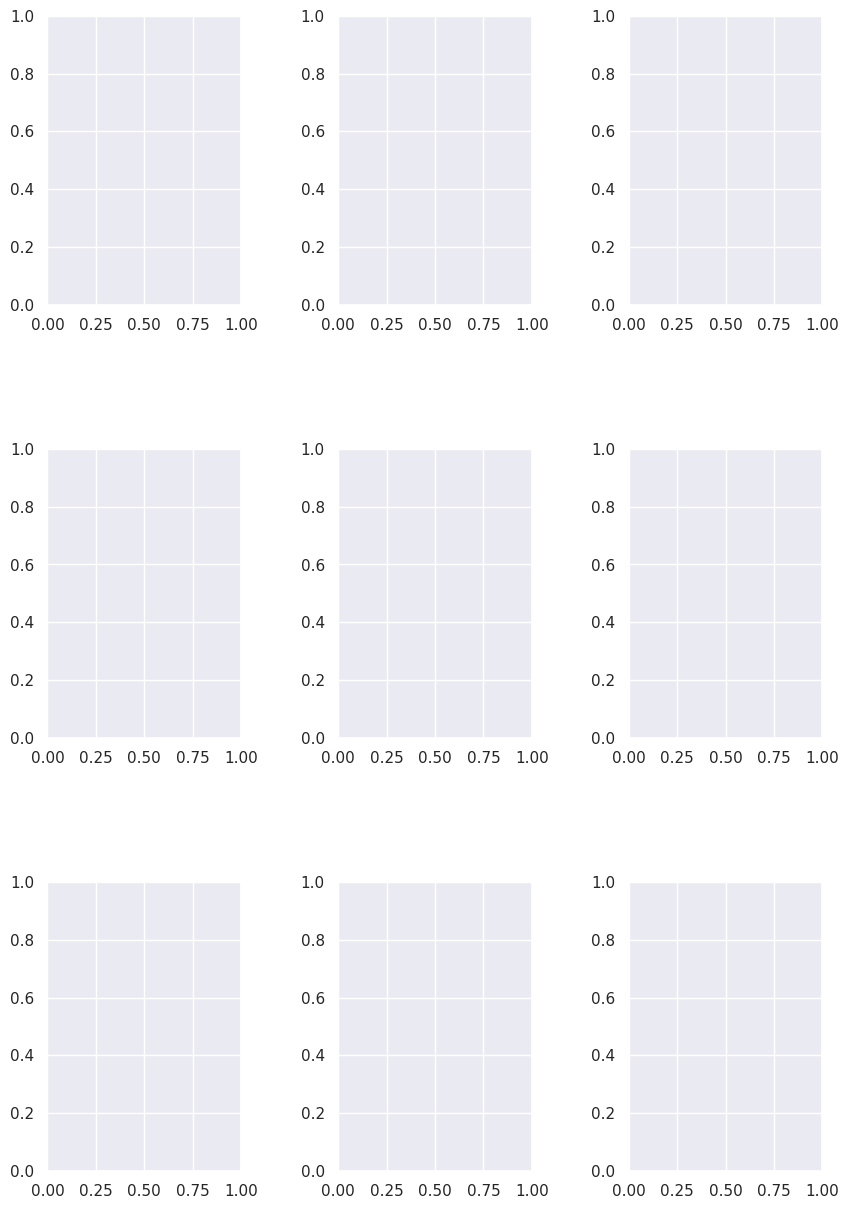

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical = ["Gender", "Occupation", "BMI Category"]

for i,cat in enumerate(categorical):

    counts = (df.groupby([cat])['Sleep Disorder']
                      .value_counts(normalize=True)
                      .unstack())

    counts.plot(kind='bar', stacked=True, ax=axs[i])



** Conclusion from Stacked Bar Plot:**

Based on the stacked bar plot analysis, several intriguing patterns emerge:

1. Sleep Disorders and Gender: Sleep apnea and insomnia seem to be more prevalent among females in the dataset.

2. Sleep Disorders and Occupations: An unusually high proportion of nurses suffer from sleep apnea, while a significant number of salespersons and teachers experience insomnia.

3. Sleep Disorders and BMI Category: Almost everyone with sleep apnea or insomnia in the dataset is overweight.

These findings raise interesting questions, especially the high prevalence of sleep disorders among nurses and the association of specific occupations with different sleep disorders. Additionally, the significant proportion of overweight individuals with sleep disorders warrants further investigation.

Based on the box plot and point plot above, we can see that there is a difference in the average probability of someone having a sleep disorder based on gender. If someone is male, then he will have a higher tendency to have a sleep disorder than someone who is female. However, does this condition also apply to the population? To answer this question, a statistical test (2 independent sample t test) can be performed.

--The presence of counter-intuitive factors suggests the possibility of selection bias in the dataset. However, if further studies can be conducted, exploring these variables in-depth may yield particularly intriguing results, as the data appears highly conclusive at this stage.--

#buat binning age, ubah dr categorical jd numerical utk sleep disorder dan gender

In [ ]:
#Using poin plot, the following code will generate the means of Sleep Disorder based on the Gender category
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "Quality of Sleep", x = "Age", data = df, ax = ax)
ax.set_title("Sleep Disorder Probability based on Gender")
plt.show()

#y = "Sleep Disorder", x = "Gender",
#numerical = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "SBP (mm Hg)", "DBP (mm Hg)"]


**Results**

Descriptive characteristics of the study populations at baseline are shown above. The mean age was 41 years in the population study. Half of the women in the population study had a BMI >25 kg/m2, compared with 35% in the basic study. The mean SBP was 118±15 mm Hg in the population study and 110±14 in the basic study, while the mean DBP was 73±11 and 69±10 mm Hg in the population and basic study, respectively.

**Numerical**
The numerical categories are mostly suitable as they are, except for blood pressure, but a solution for this is available in the notebook.
None of the categories exhibit a close enough alignment with the normal distribution to support the null hypothesis using the Shapiro-Wilk test.
There are irregularities in the quality of sleep, stress level, and physical activity level, which may be attributed to the way the questions were formulated. Similar irregular patterns are observed in blood pressure and steps, requiring further investigation and possibly affecting the normality test results.
After employing box plots and computing means for individuals with and without sleep disorders, we observe differences in means, although the statistical significance of these differences has not been tested.


**Categorical**
The categorical parameters are well-organized, and the only adjustment needed is combining occupations with a low sample size into an "unknown" level.
When conducting the ANOVA test to evaluate the impact on sleep duration, all categorical parameters show significance.
Through a stacked bar plot, it becomes evident that certain categories, such as occupation and weight, are heavily biased, with almost all instances of disorders falling into one level. This issue will be further discussed in the problems section.

## **Performing Statistical Test**

## **Building Regression Model**

Based on the results of previous statistical tests, we know that there are several variables that significantly influence the probability of a person experiencing bad sleeping habit. We will prioritize these variables in building the regression model. For insignificant variables will not be involved.

Thus, by carrying out statistical tests beforehand, we have indirectly carried out variable selection.

In [ ]:
df

In [ ]:
# Exclude variabel-variabel yang tidak memberikan efek signifikan terhadap botak_prob
# df.drop(['provinsi', 'gaji', 'berat', 'tinggi', 'sampo', 'pendidikan'], axis=1, inplace = True)
# df

In [ ]:
#Import the module for the linear regression model
#import statsmodels.formula.api as smf
#from statsmodels.formula.api import ols
#import statsmodels.api as sm
#import scipy.stats as stats

#Construct the model
#lm = smf.ols('botak_prob ~ umur + jenis_kelamin + pekerjaan + is_menikah + is_keturunan + is_merokok + stress', data = df).fit()
#print(lm.summary())

In [ ]:
#Remove variabel is_menikah karena gak signifikan secara statistik
df.drop(['is_menikah'], axis = 1, inplace = True)

#Alternative way using one hot encoding
encoded_df = pd.get_dummies(data = df, columns = ['jenis_kelamin', 'pekerjaan'])
encoded_df

In [ ]:
encoded_df.rename(columns={'jenis_kelamin_Laki-laki': 'jenis_kelamin_L',
                           'jenis_kelamin_Perempuan': 'jenis_kelamin_P',
                           'pekerjaan_Pegawai swasta' : 'pekerjaan_Pegawai_swasta'}, inplace=True)

#Construct the model
lm1 = smf.ols('botak_prob ~ umur + is_keturunan + is_merokok + stress + jenis_kelamin_L + jenis_kelamin_P + pekerjaan_Freelance + pekerjaan_PNS + pekerjaan_Pegawai_swasta + pekerjaan_Pengangguran',
              data = encoded_df).fit()
print(lm1.summary())

The T test (Test T) is a statistical test that is used to test the truth or falsity of a hypothesis which states that between two mean samples taken randomly from the same population, there is no significant difference.

## **Analyze and Interpret The Result**

Quality of Sleep: Appears to follow an exponential pattern, with a tendency towards higher values. Age: Appears to be relatively normal, without any outliers present. Sleep Duration: Uniformly distributed. Physical Activity Level: Uniformly distributed. Stress Level: Appears to be skewed towards higher values, indicating a higher prevalence of elevated stress levels. Heart Rate: Appears to follow an exponential pattern, with a bias towards lower heart rates. Daily Steps: Normal distribution pattern. SBP (mm Hg): Appears to be somewhat normal, but it is possible that it conforms to a different type of distribution. DBP (mm Hg): Appears to be a somewhat normal pattern. Notably, the distribution differs from that of SBP.

Selection Bias:
The results obtained from the categorical parameters indicate that around 90% of nurses have some form of sleep disorder, while doctors and engineers show minimal instances of such disorders. This disparity suggests the presence of selection bias in the data, which might also be responsible for the absence of normal distribution in the numerical values. Additionally, there are significant differences observed between the obese and normal BMI categories, a difference that might be unexpectedly large.

Self-Assessment Bias:
If individuals from the target group are asked to rate their stress levels or other factors, their subjective assessments could introduce bias. For example, some cancer patients may rate their diet as worse compared to non-cancer patients, even if both groups have the same diet. A similar issue could arise with the self-assessment of physical activity levels. Such biases have the potential to significantly impact the reliability and predictability of the study's conclusions.

Correlation:
Due to the presence of selection bias, any inferences made about individuals with sleep disorders could be interpreted as observations about overweight individuals as well. Furthermore, the correlation with occupation further diminishes the explanatory power of our analysis.

#
## **Kesimpulan dan Saran/Rekomendasi:**
Setelah dilakukan analisis statistik, kita mendapatkan beberapa insight yang di mana dapat menjawab beberapa pertanyaan yang telah disebutkan sebelumnnya.

- Variabel manakah pada data yang mempunyai pengaruh terhadap probabilitas seseorang mengalami kebotakan?
Berdasarkan hasil EDA yang telah dilakukan, bahwa terdapat 5 faktor yang mempengaruh probabilitas seseorang mengalami kebotakan, yaitu : jenis kelamin, status pernikahan, status mempunyai keturunan, jenis pekerjaan, dan status apakah orang tersebut merokok atau tidak.

    1. **Faktor Jenis Kelamin**. Apabila seseorang berjenis kelamin laki-laki, maka ia memiliki kecenderungan yang lebih tinggi untuk mengalami kebotakan dibandingkan dengan seseorang yang berjenis
kelamin perempuan.
    
    2. **Faktor Status Mempunyai Keturunan**.  Apabila seseorang memiliki keturunan, maka ia memiliki kecenderungan yang lebih tinggi untuk mengalami kebotakan dibandingkan dengan seseorang yang tidak memiliki keturunan.
    
    3. **Faktor Status Jenis Pekerjaan**.  Apabila seseorang menganggur, maka memiliki kecenderungan yang paling tinggi untuk mengalami kebotakan dibandingkan dengan orang yang memiliki pekerjaan. Kemudian, Orang yang bekerja sebagai freelancer memiliki tingkat kecenderungan yang paling rendah untuk mengalami kebotakan dibandingkan orang yang bekerja menjadi PNS & Pegawai swasta.
    
    4. **Faktor Status Merokok**.  Apabila seseorang merupakan perokok, maka ia memiliki kecenderungan yang lebih tinggi untuk mengalami kebotakan dibandingkan dengan seseorang yang bukan perokok.
    
- Apakah variabel stress mempunyai hubungan yang kuat dengan probabilitas seseorang mengalami kebotakan?

    - Berdasarkan hasil EDA yang telah dilakukan, variabel stress memiliki hubungan yang cukup kuat dengan tingkat probabilitas seseorang mengalami kebotakan. hal ini ditandai dengan nilai koefisien korelasi 0.25 < r < 0.5.
    
- Apakah variabel umur mempunyai hubungan yang kuat dengan probabilitas seseorang mengalami kebotakan?

    - Berdasarkan hasil EDA yang telah dilakukan, variabel umur memiliki hubungan yang cukup kuat dengan tingkat probabilitas seseorang mengalami kebotakan. hal ini ditandai dengan nilai koefisien korelasi 0.25 < r < 0.5.
    
- Apakah variabel gaji mempunyai hubungan yang kuat dengan probabilitas seseorang mengalami kebotakan?

    - Berdasarkan hasil EDA yang telah dilakukan, variabel gaji tidak memiliki hubungan yang kuat dengan tingkat probabilitas seseorang mengalami kebotakan. hal ini ditandai dengan nilai koefisien korelasi 0 < r < 0.25.

- Apakah variabel berat dan tinggi badan mempunyai hubungan yang kuat dengan probabilitas seseorang mengalami kebotakan?

    - Berdasarkan hasil EDA yang telah dilakukan, variabel berat dan tinggi tidak memiliki hubungan yang kuat dengan tingkat probabilitas seseorang mengalami kebotakan. hal ini ditandai dengan nilai koefisien korelasi 0 < r < 0.25.
    
- Bagaimana kesimpulan akhirnya ? dan rekomendasi apakah yang dapat dilakukan?

    - Terdapat 4 faktor yang menjadi perhatian, yaitu jenis kelamin, status mempunyai keturunan, jenis pekerjaan, dan status apakah orang tersebut merokok atau tidak. Faktor tersebut dapat mempengaruhi tingkat kecenderungan seseorang mengalami kebotakan. Dua faktor yang dapat dilakukan upaya dalam mengurangi kecenderungan seseorang mengalami kebotakan, yaitu :
        1. **Faktor Pekerjaan**. Upaya yang dapat dilakukan, yaitu membuka lapangan pekerjaan dan pelatihan bagi orang yang masih menganggur, sehingga mereka bisa mendapatkan pekerjaan dan mengurangi kecenderugan mengalami kebotakan.
        2. **Faktor Status Perokok**. Upaya yang dapat dilakukan, yaitu memberikan suatu ajakan untuk hidup sehat dan berhenti merokok bagi seseorang yang masih kecanduan untuk merokok.

## **Summary and Recommendations**